In [2]:
from sleeper_wrapper.league import League
from sleeper_wrapper.base_api import BaseApi
from sleeper_wrapper.user import User
from sleeper_wrapper.drafts import Drafts
from sleeper_wrapper.stats import Stats
from sleeper_wrapper.players import Players
import pandas as pd
import json
import pprint
import matplotlib.pyplot as plt

In [3]:
league_21 = League(719361504427728896)
league_22 = League(784689960694439936)
league_23 = League(959512549940088832)
league_24 = League(1073439695679467520)

leagues = [league_21, league_22, league_23, league_24]

In [4]:
users_21 = league_21.get_users()
users_22 = league_22.get_users()
users_23 = league_23.get_users()
users_24 = league_24.get_users()

users = [users_21, users_22, users_23, users_24]

In [5]:
display_names_to_user_ids = {}
for object in users:
    for user in object:
        display_names_to_user_ids[user['display_name']] = user['user_id']


In [7]:
rosters_21 = league_21.get_rosters()
rosters_22 = league_22.get_rosters()
rosters_23 = league_23.get_rosters()
rosters_24 = league_24.get_rosters()

rosters = [rosters_21, rosters_22, rosters_23, rosters_24]


In [8]:
league_21.get_matchups(17)

[{'points': 150.66,
  'players': ['1339',
   '1825',
   '2320',
   '2449',
   '2505',
   '4035',
   '4039',
   '6083',
   '6768',
   '6885',
   '7564',
   '7588',
   '7610',
   '7611',
   'IND'],
  'roster_id': 1,
  'custom_points': None,
  'matchup_id': 3,
  'starters': ['7610',
   '7588',
   '4035',
   '4039',
   '2449',
   '1339',
   '7564',
   '6083',
   'IND'],
  'starters_points': [19.06, 4.2, 21.0, 21.5, 10.2, 11.1, 55.6, 2.0, 6.0],
  'players_points': {'1339': 11.1,
   '1825': 8.9,
   '2320': 10.2,
   '2449': 10.2,
   '2505': 0.0,
   '4035': 21.0,
   '4039': 21.5,
   '6083': 2.0,
   '6768': 4.3,
   '6885': 6.5,
   '7564': 55.6,
   '7588': 4.2,
   '7610': 19.06,
   '7611': 22.7,
   'IND': 6.0}},
 {'points': 124.26,
  'players': ['1466',
   '3306',
   '4046',
   '4068',
   '4195',
   '5022',
   '5347',
   '536',
   '5859',
   '5937',
   '6786',
   '6813',
   '6945',
   '7537',
   'CHI'],
  'roster_id': 2,
  'custom_points': None,
  'matchup_id': 1,
  'starters': ['4046',
   '6813

In [10]:
all_years_matchups = []
for league_num in range(21, 25):
    league = globals()[f'league_{league_num}']

    league_year_matchups = []
    for i in range(15):
        matchups = league.get_matchups(i)
        league_year_matchups.append(matchups)

    all_years_matchups.append(league_year_matchups)

In [11]:
team_name_to_display_name = {}
for object in users:
    for user in object:
        team_name = user.get('metadata', {}).get('team_name')
        if team_name:
            team_name_to_display_name[team_name] = user['display_name']

In [12]:
roster_id_to_display_name = {}

for object in rosters:
    for roster in object:
        roster_id_to_display_name[roster['roster_id']] = roster['owner_id']

In [13]:
#reverse display name to user id
user_id_to_display_name = {user_id: display_name for display_name, user_id in display_names_to_user_ids.items()}

In [14]:
roster_to_display_name = {roster_id: user_id_to_display_name[user_id] for roster_id, user_id in roster_id_to_display_name.items()}


In [15]:
pprint.pp(roster_id_to_display_name)

{1: '712402115632373760',
 2: '712402564943028224',
 3: '719344483250155520',
 4: '713281083025747968',
 5: '719330870766411776',
 6: '719375265469362176',
 7: '719404260776828928',
 8: '716723709183868928',
 9: '713592138331422720',
 10: '713589650459033600',
 11: '720018737989775360',
 12: '720076464837447680'}


In [16]:
pprint.pp(roster_to_display_name)

{1: 'Perrry',
 2: 'Termie',
 3: 'CrustyPoots',
 4: 'Mikmikcrf',
 5: 'jamesgb',
 6: 'WuWei',
 7: 'Ravenempire',
 8: 'chuckn0rris',
 9: 'roco5marco',
 10: 'Swooboobler',
 11: 'MikeOxmall69420',
 12: 'gogglespaysano'}


In [15]:
from collections import defaultdict

In [25]:
player_records = defaultdict(lambda: defaultdict(lambda: [0, 0]))

for year_index, matchup_yr in enumerate(all_years_matchups):  # Assuming this loop goes over the years
    # Set 'Mikmikcrf' for all years except when year_index == 2
    if year_index == 2:
        roster_to_display_name[4] = 'Nosy'  # Only set 'Nosy' for year_index 2
    else:
        roster_to_display_name[4] = 'Mikmikcrf'  # For all other years, it's 'Mikmikcrf'
    
    for matchup_week in matchup_yr:
        matchup_groups = defaultdict(list)

        # Step 1: Group matchups by matchup_id
        for matchup in matchup_week:
            matchup_groups[matchup['matchup_id']].append(matchup)

        # Step 2: Process each matchup within the week
        for matchup_id, players in matchup_groups.items():
            if len(players) == 2:  # Ensure there are two players in the matchup
                player1, player2 = players

                # Get roster IDs and points
                roster_id1, points1 = player1['roster_id'], player1['points']
                roster_id2, points2 = player2['roster_id'], player2['points']
                
                if points1 == 0.0 and points2 == 0.0:
                    continue  # Skip this iteration

                # Map roster IDs to display names
                player1_name = roster_to_display_name[roster_id1]
                player2_name = roster_to_display_name[roster_id2]
                
                # Determine the winner and loser
                if points1 > points2:
                    winner, loser = player1_name, player2_name
                else:
                    winner, loser = player2_name, player1_name
                
                # Step 3: Track the win/loss record
                player_records[winner][loser][0] += 1  # Increment winner's win count against loser
                player_records[loser][winner][1] += 1  # Increment loser's loss count against winner

In [26]:
for player, opponents in player_records.items():
        print(f"Player: {player}")
        for opponent, record in opponents.items():
            wins, losses = record
            print(f"  Against {opponent}: Wins = {wins}, Losses = {losses}")
        print("\n")  # Newline between different players

Player: MikeOxmall69420
  Against Perrry: Wins = 4, Losses = 2
  Against CrustyPoots: Wins = 2, Losses = 2
  Against chuckn0rris: Wins = 4, Losses = 2
  Against jamesgb: Wins = 0, Losses = 4
  Against Mikmikcrf: Wins = 1, Losses = 1
  Against WuWei: Wins = 2, Losses = 2
  Against roco5marco: Wins = 0, Losses = 4
  Against Termie: Wins = 3, Losses = 2
  Against Ravenempire: Wins = 1, Losses = 3
  Against gogglespaysano: Wins = 3, Losses = 0
  Against Swooboobler: Wins = 0, Losses = 4
  Against Nosy: Wins = 2, Losses = 0


Player: Perrry
  Against MikeOxmall69420: Wins = 2, Losses = 4
  Against chuckn0rris: Wins = 4, Losses = 1
  Against CrustyPoots: Wins = 3, Losses = 2
  Against Mikmikcrf: Wins = 2, Losses = 0
  Against jamesgb: Wins = 1, Losses = 3
  Against roco5marco: Wins = 1, Losses = 3
  Against WuWei: Wins = 3, Losses = 1
  Against Ravenempire: Wins = 4, Losses = 0
  Against Termie: Wins = 2, Losses = 3
  Against Swooboobler: Wins = 2, Losses = 1
  Against gogglespaysano: Wins =

In [27]:
import pandas as pd
import seaborn as sns

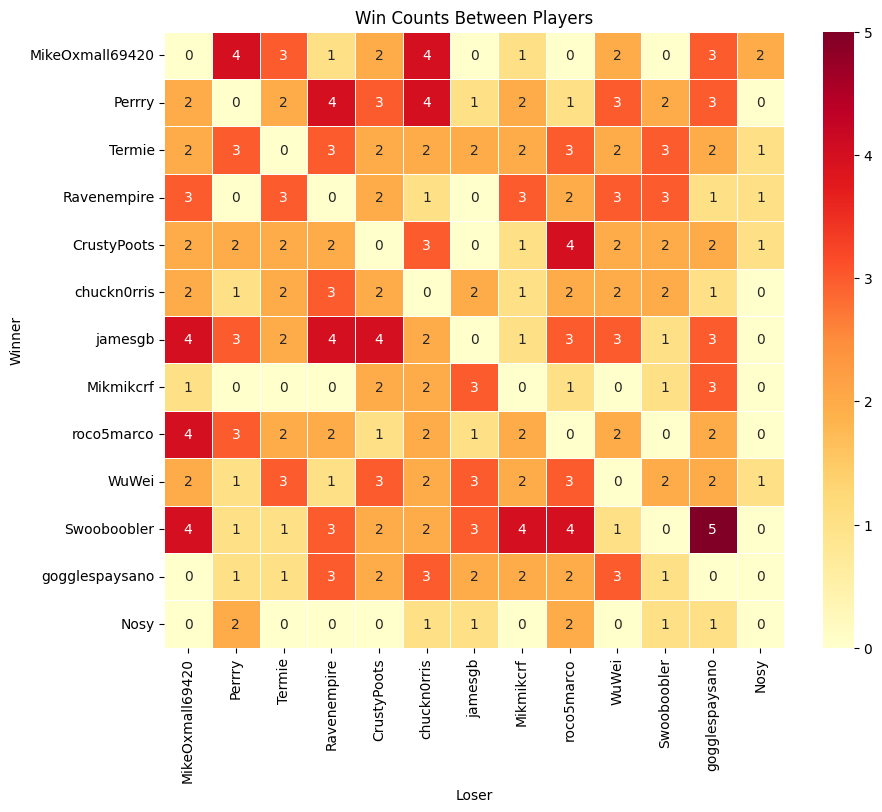

In [28]:
# Prepare a list of all players involved in the player_records
players = list(player_records.keys())

# Create an empty DataFrame to store win counts
win_matrix = pd.DataFrame(0, index=players, columns=players)

# Fill the matrix with the number of wins from player_records
for winner, losers in player_records.items():
    for loser, record in losers.items():
        wins = record[0]  # We only care about wins for this heatmap
        win_matrix.at[winner, loser] = wins

# Create a heatmap of the win matrix
plt.figure(figsize=(10, 8))
sns.heatmap(win_matrix, annot=True, cmap="YlOrRd", linewidths=.5, fmt='g')
plt.title('Win Counts Between Players')
plt.xlabel('Loser')
plt.ylabel('Winner')
plt.show()

In [29]:
'''all_years_scoreboards = []

for year in range(21, 24):
    roster = globals()[f'rosters_{year}']
    user = globals()[f'users_{year}']
    league = globals()[f'league_{year}']

    all_weeks_scoreboards = []
    for i in range(15):
        matchups = league.get_matchups(i)
        scoreboard = league.get_scoreboards(roster, matchups, user, score_type="pts_ppr",week=i)
        all_weeks_scoreboards.append(scoreboard)
        
    all_years_scoreboards.append(all_weeks_scoreboards)'''

'all_years_scoreboards = []\n\nfor year in range(21, 24):\n    roster = globals()[f\'rosters_{year}\']\n    user = globals()[f\'users_{year}\']\n    league = globals()[f\'league_{year}\']\n\n    all_weeks_scoreboards = []\n    for i in range(15):\n        matchups = league.get_matchups(i)\n        scoreboard = league.get_scoreboards(roster, matchups, user, score_type="pts_ppr",week=i)\n        all_weeks_scoreboards.append(scoreboard)\n        \n    all_years_scoreboards.append(all_weeks_scoreboards)'

In [30]:
'''for year_data in all_years_scoreboards:
    # Skip any None or empty lists
    if not year_data:
        continue
    
    for week_data in year_data:
        # Check if week_data is a dictionary of matchups
        if isinstance(week_data, dict):
            for week, matchups in week_data.items():
                updated_matchups = []
                for team, score in matchups:
                    # Replace team name if it exists in the mapping
                    new_team_name = team_name_to_display_name.get(team, team)  # Default to the original name if no mapping
                    updated_matchups.append((new_team_name, score))
                
                # Update the matchups with the updated team names
                week_data[week] = updated_matchups'''

'for year_data in all_years_scoreboards:\n    # Skip any None or empty lists\n    if not year_data:\n        continue\n    \n    for week_data in year_data:\n        # Check if week_data is a dictionary of matchups\n        if isinstance(week_data, dict):\n            for week, matchups in week_data.items():\n                updated_matchups = []\n                for team, score in matchups:\n                    # Replace team name if it exists in the mapping\n                    new_team_name = team_name_to_display_name.get(team, team)  # Default to the original name if no mapping\n                    updated_matchups.append((new_team_name, score))\n                \n                # Update the matchups with the updated team names\n                week_data[week] = updated_matchups'

In [31]:
'''# Filter out any user(s) you don't want
for year_data in all_years_scoreboards:
    if not year_data:
        continue
    
    for week_data in year_data:
        if isinstance(week_data, dict):
            for week, matchups in week_data.items():
                filtered_matchups = [(team, score) for team, score in matchups if 'Nosy' not in team]
                
                # Update the week_data with the filtered matchups
                week_data[week] = filtered_matchups'''

"# Filter out any user(s) you don't want\nfor year_data in all_years_scoreboards:\n    if not year_data:\n        continue\n    \n    for week_data in year_data:\n        if isinstance(week_data, dict):\n            for week, matchups in week_data.items():\n                filtered_matchups = [(team, score) for team, score in matchups if 'Nosy' not in team]\n                \n                # Update the week_data with the filtered matchups\n                week_data[week] = filtered_matchups"